# 用神经网络的方法来拟合三角函数的数据

## 一、制造数据
加入噪声

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-10,10,2000)[:,np.newaxis]
print(np.shape(x_data))
y_noise = np.random.normal(0,0.1,x_data.shape)
y_data = np.sin(x_data) + y_noise

plt.plot(x_data,y_data)
plt.show()

(2000, 1)


<Figure size 640x480 with 1 Axes>

## 二、构建BP神经网络
### BP Network: 
1. full connected 2. two hidden layers
<img src="https://miro.medium.com/max/1400/1*ZB6H4HuF58VcMOWbdpcRxQ.png" width = "300" height = "200" alt="图片名称" align=center />

### activation functions:

* sigmoind && tanh
<img src="http://ronny.rest/media/blog/2017/2017_08_16_tanh/tanh_v_sigmoid.jpg" width = "400" height = "400" alt="图片名称" align=center />

* relu && leaky relu:
<img src="https://blog.paperspace.com/content/images/2018/06/ReLu.png" width = "400" height = "400" alt="图片名称" align=center />

In [2]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

#占位
x = tf.placeholder(tf.float32,[None,1],name='x')
y = tf.placeholder(tf.float32,[None,1],name='y')
keep_prob = tf.placeholder(tf.float32,name='keep_prob')

#first fully layer
w_fc1 = weight_variable([1,2048])
b_fc1 = bias_variable([2048])
h_fc1 = tf.nn.relu(tf.nn.bias_add(tf.matmul(x,w_fc1),b_fc1))
h_fc1_drop = tf.nn.dropout(h_fc1,keep_prob)

#second fully layer
w_fc2 = weight_variable([2048,2048])
b_fc2 = bias_variable([2048])
h_fc2 = tf.nn.relu(tf.nn.bias_add(tf.matmul(h_fc1_drop,w_fc2),b_fc2))
h_fc2_drop = tf.nn.dropout(h_fc2,keep_prob)

#output layer
w_fc3 = weight_variable([2048,1])
b_fc3 = bias_variable([1])
y_output = tf.nn.bias_add(tf.matmul(h_fc2_drop,w_fc3),b_fc3,name='y_output')

W0718 13:43:17.946912 14168 deprecation.py:506] From <ipython-input-2-ad21d9648233>:18: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## 三、定义损失函数和优化器
#### Optimizer：
* Gradient Descent：梯度下降法是一个一阶最优化算法，通常也称为最速下降法。 要使用梯度下降法找到一个函数的局部极小值，必须向函数上当前点对应梯度的反方向的规定步长距离点进行迭代搜索。
* Momentum：SGD 在 ravines 的情况下容易被困住， ravines 就是曲面的一个方向比另一个方向更陡，这时 SGD 会发生震荡而迟迟不能接近极小值
* Adagrad(Adaptive gradient algorithm)：这个算法就可以对低频的参数做较大的更新，对高频的做较小的更新，也因此，对于稀疏的数据它的表现很好，很好地提高了 SGD 的鲁棒性
* Adadelta：这个算法是对 Adagrad 的改进，和 Adagrad 相比，就是分母的 G 换成了过去的梯度平方的衰减平均值，指数衰减平均值
* RMSprop：RMSprop 和 Adadelta 都是为了解决 Adagrad 学习率急剧下降问题的，
* Adam(Adaptive Moment Estimation)：这个算法是另一种计算每个参数的自适应学习率的方法。相当于 RMSprop + Momentum。实践表明，Adam 比其他适应性学习方法效果要好。
<br><br>
<table><tr>
<td><img src="https://images2018.cnblogs.com/blog/1192699/201803/1192699-20180311105558593-251578131.gif" width = "300" height = "200" alt="Optimizer" align=center /></td>
<td><img src="https://images2018.cnblogs.com/blog/1192699/201803/1192699-20180311110108768-2113908893.gif" width = "300" height = "200" alt="Optimizer" align=center /></td>
</tr></table>

In [3]:
loss = tf.reduce_mean(tf.square(y_output-y_data))
train_step = tf.compat.v1.train.AdamOptimizer(1e-4).minimize(loss)

real = tf.reshape(y,[-1, 1])
correct_prediction = tf.equal(y_output,real)
correct_prediction = tf.cast(correct_prediction, tf.float32)
accuracy = tf.reduce_mean(correct_prediction,name='accuracy')

## 四、开始运算

step:100,train loss:0.375647,accuracy:0.000000


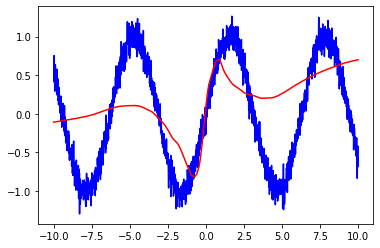

step:200,train loss:0.427975,accuracy:0.000000


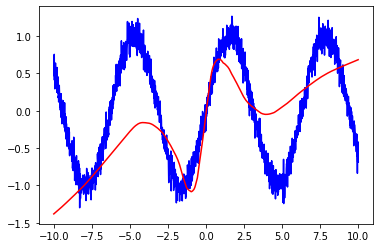

step:300,train loss:0.569040,accuracy:0.000000


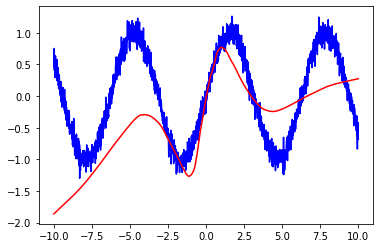

step:400,train loss:0.334278,accuracy:0.000000


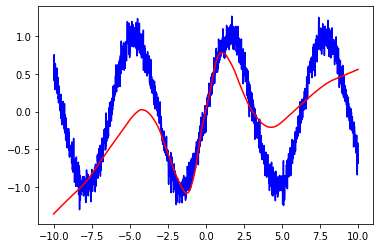

KeyboardInterrupt: 

In [4]:
with tf.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    step = 1
    train_loss=1
    while train_loss>0.001:
        sess.run(train_step,feed_dict={x: x_data, y: y_data, keep_prob: 0.75})
        if step%100 == 0:
            pred,acc,train_loss = sess.run([y_output,accuracy,loss],feed_dict={x: x_data, y: y_data, keep_prob: 1.00})
            print ('step:%d,train loss:%f,accuracy:%f' % (step,train_loss,acc))
            plt.plot(x_data,y_data,'b',x_data,pred,'r')
            plt.show()
        step += 1